In [ ]:
! pip install swifter
! pip install pandas
! pip install textacy
! pip install spacy

In [ ]:
! python -m spacy download en_core_web_sm

In [ ]:
from os import listdir
from os.path import isfile, join
import spacy
import pandas as pd
from tqdm.auto import tqdm 
import swifter
import plotly.express as px
from wordcloud import WordCloud
from matplotlib import pyplot as plt
from spacy import displacy
from collections import Counter
import textacy
# import textacy

pd.options.plotting.backend = "plotly"


def loadData(path: str) -> list():
    onlyfiles = [join(path, f) for f in listdir(path) if isfile(join(path, f))]
    data_frames = []
    for i, el in enumerate(onlyfiles):
      df = pd.read_csv(el)
      data_frames.append(df)
    return data_frames

def prepare(df):
  df['Text'] = df['Text'].swifter.apply(lambda x: x.lower())
  df['Text'] = df['Text'].swifter.apply(lambda x: x.replace('@', ''))
  df['Text_en'] = df['Text'].swifter.apply(en)
  df['Token'] = df['Text_en'].swifter.apply(lambda x: [token.lemma_ for token in x if not token.is_stop if not token.is_punct])
  df['2_grams'] = df['Text_en'].swifter.apply(lambda x: list(textacy.extract.basics.ngrams(x, 2, min_freq=1)))
  df['3_grams'] = df['Text_en'].swifter.apply(lambda x: list(textacy.extract.basics.ngrams(x, 3, min_freq=1)))
  return df

def word_cloud(df, token, grams, no_word, n=30, m= 30 ):

  word_counts1 = dict(Counter(df[token].sum()).most_common(n))
  word_counts2 = dict(Counter(df[grams].sum()))
  word_counts2 = {str(k): v for k,v in word_counts2.items()}

  for el in word_counts2.keys():
    for word in el.split(' '):
      if word in word_counts1 and word not in no_word:
        word_counts2[el] += word_counts1[word]
  word_counts2 = dict(Counter(word_counts2).most_common(m))
  wc = WordCloud(width=800, height=400)
  wc.generate_from_frequencies(frequencies=word_counts2)
  plt.figure(figsize=(10,8))
  plt.imshow(wc)

In [ ]:
en = spacy.load("en_core_web_sm") # loading spacy model

In [ ]:
#en.Defaults.stop_words |= {"@.*",}

# NETFLIX

JednƒÖ z sankcji na≈Ço≈ºonƒÖ na Rosjƒô jest zawieszenie platformy Netflix. Na podstawie tego zbioru przeanalizowali≈õmy pewne cechy tweetow. Zrobili≈õmy standardowe processing zbioru do token√≥w i usuwaniu stop word√≥w. Dokonakli≈õmy te≈º przekszta≈Çce≈Ñ do ma≈Çych liter oraz usunieciƒô zbƒôdnych znak√≥w. Nastƒôpnie badali≈õmy czƒôsto≈õƒá wystƒôpowania s≈Ç√≥w. Ze wzglƒôd√≥w na spos√≥b zbierania zbioru stop wordem bƒôdziƒô r√≥wnie≈º s≈Çowo po k√≥rym by≈Ç szukne tweety.

Natomiast bardziej interesujace powinny byƒá n-gramy s≈Ç√≥w. Niestety okaza≈Ço sie, ze przy 10k tweetach nie ma wcale, albo jest bardzo ma≈Ço pow√≥rze≈Ñ. Dlatego prezentacja dla 2, 3 gram√≥w bazuje na wyborze tych n-gram√≥w, kt√≥re sk≈ÇadajƒÖ siƒô z naczƒô≈õciej wystepujƒÖcych s≈Ç√≥w

In [ ]:
df_netflix = pd.read_csv('/content/drive/MyDrive/data/data/netflix_ban_10k.csv')

In [ ]:
df_netflix = prepare(df_netflix)

Pandas Apply:   0%|          | 0/10001 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10001 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10001 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10001 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10001 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10001 [00:00<?, ?it/s]

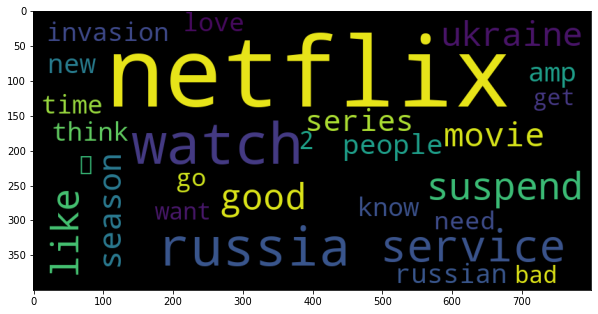

In [ ]:
word_counts1 = dict(Counter(df_netflix['Token'].sum()).most_common(30))
wc = WordCloud(width=800, height=400)
wc.generate_from_frequencies(frequencies=word_counts1)
plt.figure(figsize=(10,8))
plt.imshow(wc)

Tak to wyglƒÖda gdy bezmyslnie dajemy worldcloud, gdzie wystepowanie kazdego 3- gramu wystƒôpuje raz. StƒÖd nie widaƒá tutaj jaki≈õ konretnych rzeczy, a bardziej losowe rzeczy zwiƒÖzane z Netflixem.

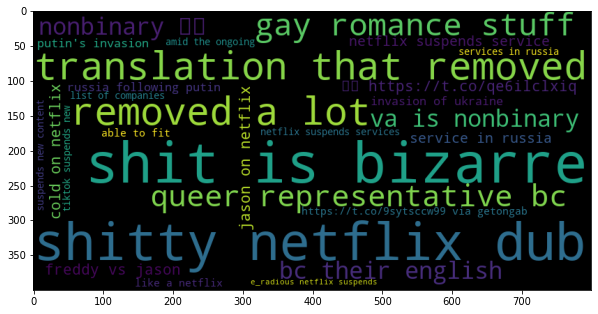

In [ ]:
word_counts1 = dict(Counter(df_netflix['3_grams'].sum()).most_common(30))
word_counts1 = {str(k): v for k,v in word_counts1.items()}
wc = WordCloud(width=800, height=400)
wc.generate_from_frequencies(frequencies=word_counts1)
plt.figure(figsize=(10,8))
plt.imshow(wc)

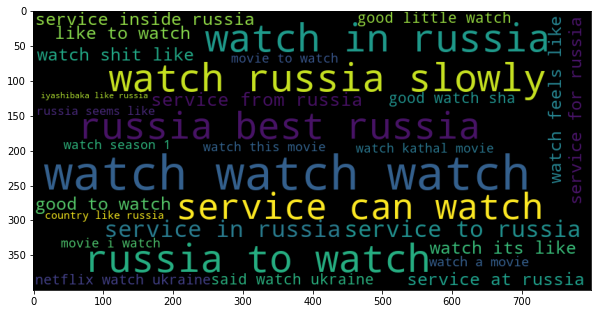

In [ ]:
word_cloud(df_netflix, 'Token', '3_grams', ['netflix'])

W zbiorze danych mamy te≈º informacje o likeach pod tweetami.

In [ ]:
def sort_likes(df):
  return df.sort_values('Likes Count', ascending = False)

Tutaj rozk≈Çad posortowanych po liczbie lik√≥w

In [ ]:
px.histogram(sort_likes(df_netflix).head(500)['Likes Count'], log_y=True)

Widzimy, ≈ºe sƒÖ dwa tweety, kt√≥re maja widocznie wiƒôksza liczbƒô likow. Analiza tych top tweetow, ≈ºeby zobaczyƒá jak teamt snakcji Netflixa by≈Ç poruszony na Twitterze, czy jedank sprawy bierzƒÖce zwiƒÖzne z serialami i filmami by≈Çy istotniejsze.

In [ ]:
top_tweets = sort_likes(df_netflix).head(2).Text_en
displacy.render(top_tweets.iloc[0], style='ent',jupyter=True)
print()
displacy.render(top_tweets.iloc[1], style='ent',jupyter=True)

Widzimy, ze tak naprawdƒô jest zar√≥wno o tym jak  i o drugim, chocia≈º tweet o tym, ze nie widomo co obejrzeƒá cieszy siƒô wikszym zainteresowaniem 

W zwiƒÖzku z tym, ≈ºe mamy dostƒôp do tego to mo≈ºemy te≈º zobaczyƒá jakie tweety uzyska≈Çy najwiƒôcej lik√≥w. Wybralismy top 500 tweet√≥w i chcieli≈õmy zobaczyƒá w jak w tej we≈ºszej grypie tweet√≥w wyglƒÖda zbi√≥r najczƒôstszych s≈Ç√≥w.

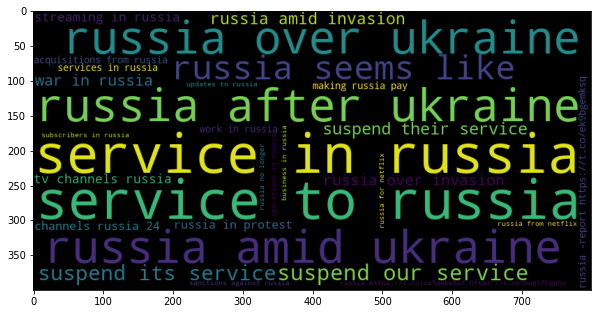

In [ ]:
word_cloud(sort_likes(df_netflix).head(500), 'Token', '3_grams', ['netflix'])

# MC Donalds

In [ ]:
df_mcdonalds = pd.read_csv('/content/drive/MyDrive/data/data/mcdonalds_ban_10k.csv')

In [ ]:
df_mcdonalds = prepare(df_mcdonalds)

Pandas Apply:   0%|          | 0/10001 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10001 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10001 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10001 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10001 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10001 [00:00<?, ?it/s]

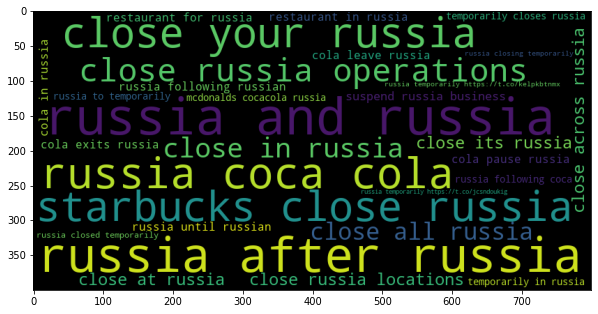

In [ ]:
word_cloud(df_mcdonalds, 'Token', '3_grams', ['mcdonald'])

In [ ]:
px.histogram(sort_likes(df_mcdonalds).head(500)['Likes Count'], log_y=True)

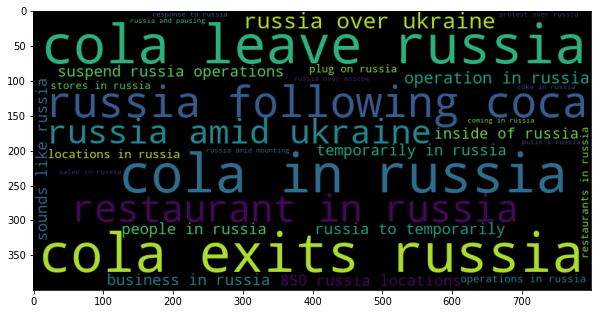

In [ ]:
word_cloud(sort_likes(df_mcdonalds).head(500), 'Token', '3_grams', ['mcdonald'])

In [ ]:
top_tweets = sort_likes(df_mcdonalds).head(2).Text_en
displacy.render(top_tweets.iloc[0], style='ent',jupyter=True)
print()
displacy.render(top_tweets.iloc[1], style='ent',jupyter=True)

# SWIFT

In [ ]:
df_swift = pd.read_csv('/content/drive/MyDrive/data/data/swift_ban_50k.csv')

In [ ]:
df_swift = prepare(df_swift)

Pandas Apply:   0%|          | 0/15945 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/15945 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/15945 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/15945 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/15945 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/15945 [00:00<?, ?it/s]

W tym przypadku ze wzgledu na to ze oprocz systemu SWIFT mamy rownie≈º klub pi≈Çkarski oraz Tylor Swift. To powodowa≈Ço, ≈ºe wiele tweetow byly o r√≥znej tematyce. Mozemy siƒô jadnak ich pozbyƒá, W√≥wczas mamy

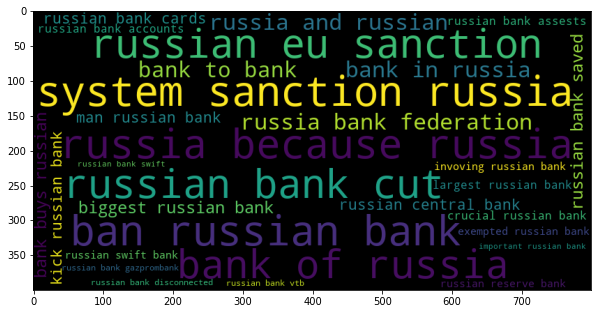

In [ ]:
word_cloud(df_swift, 'Token', '3_grams', ['taylor', 'swift'])

A tak to wyglƒÖda gdy Tylo Swift pozostaje w zbiorze

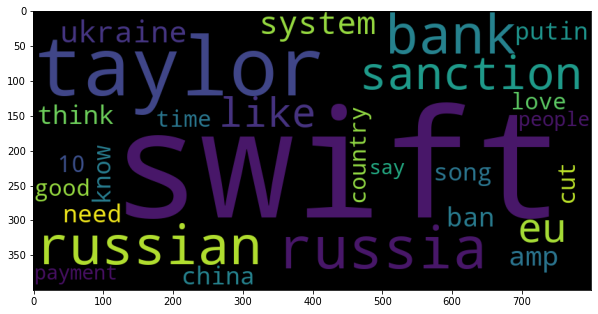

In [ ]:
word_counts1 = dict(Counter(df_swift['Token'].sum()).most_common(30))
wc = WordCloud(width=800, height=400)
wc.generate_from_frequencies(frequencies=word_counts1)
plt.figure(figsize=(10,8))
plt.imshow(wc)

In [ ]:
px.histogram(sort_likes(df_swift).head(500)['Likes Count'], log_y=True)

W tym przypadku we≈∫my trochƒô wiecej tweet√≥w

In [ ]:
top_tweets = sort_likes(df_swift).head(5).Text_en
for i in range(len(top_tweets)):
  displacy.render(top_tweets.iloc[i], style='ent',jupyter=True)
  print()

Widzimy, ze niestyety popularno≈õƒá Tylor Swift przyƒámi≈Ça teamt SWIFTU w tweetac, a przy najmniej w dniu sankcji. Musimy siƒô wiƒôc pozbyƒá ich, poniewa≈º nie sƒÖ one zwiƒÖzne z pracƒÖ badawczƒÖ jaka